### Bollinger Bands Mean Reversion Strategy
Extracted from lecture 2 of Algorithmic Trading, original source obtained from  [Algorithmic Trading Society Lectures Imperial College London](https://github.com/algotradingsoc/Lectures2022/blob/main/AlgoTradeSocLectures.ipynb).

**Mean Reversion**: Financial Instruments are from time to time overbought/oversold and revert back to mean prices.

**Bollinger Bands:** Consist of a SMA and upper and lower bands 2 std dev away from SMA.

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


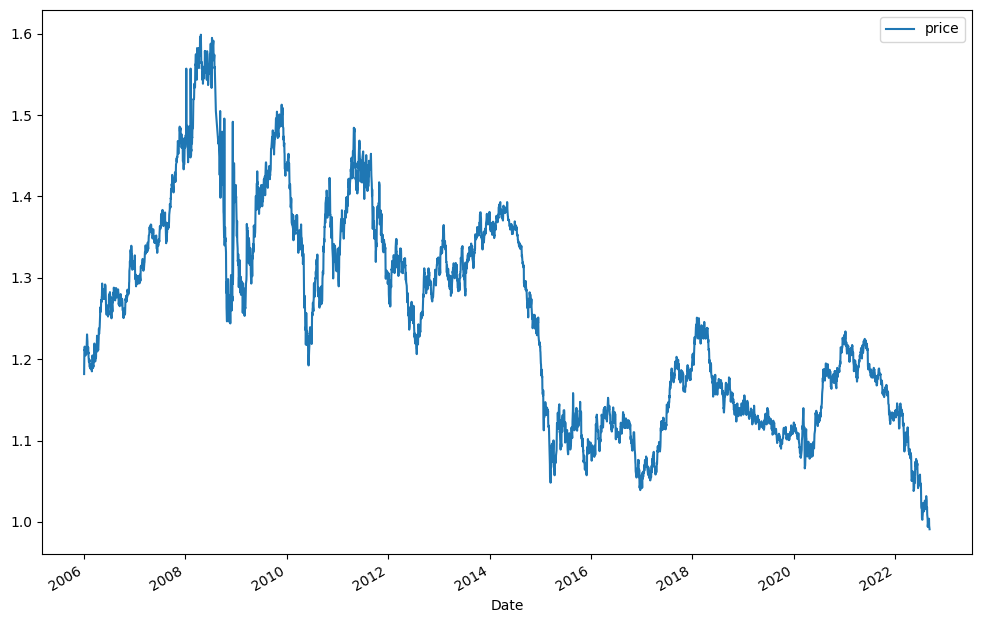

In [6]:
# Extract and prepare data
EURUSD = yf.download("EURUSD=x", start = "2006-01-01", end = "2022-09-06")
data = pd.DataFrame()
data["price"] = EURUSD["Close"]

data.plot(figsize = (12, 8))
plt.show()
data["returns"] = np.log(data.div(data.shift(1)))

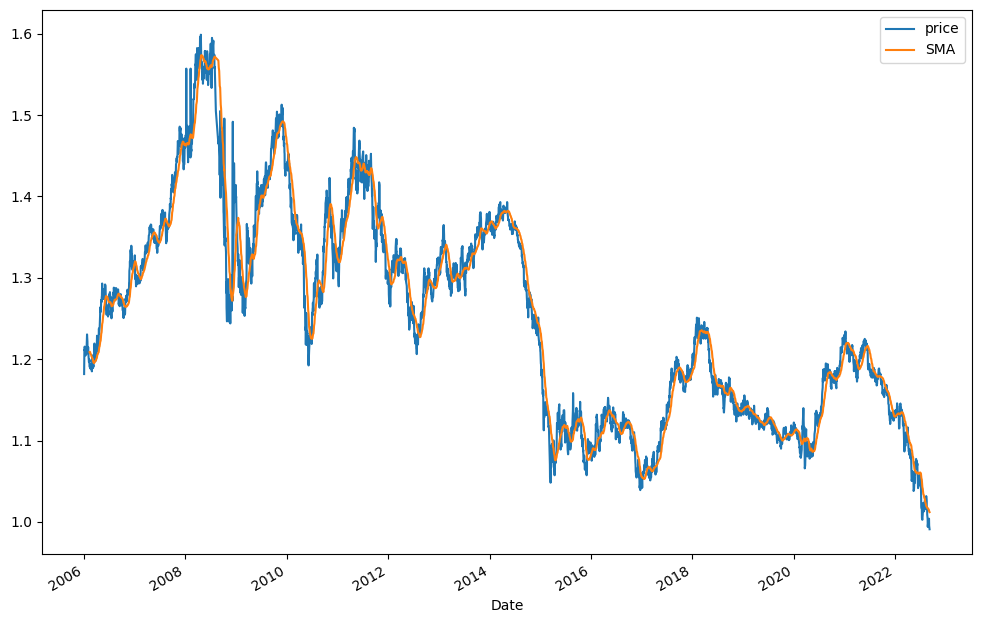

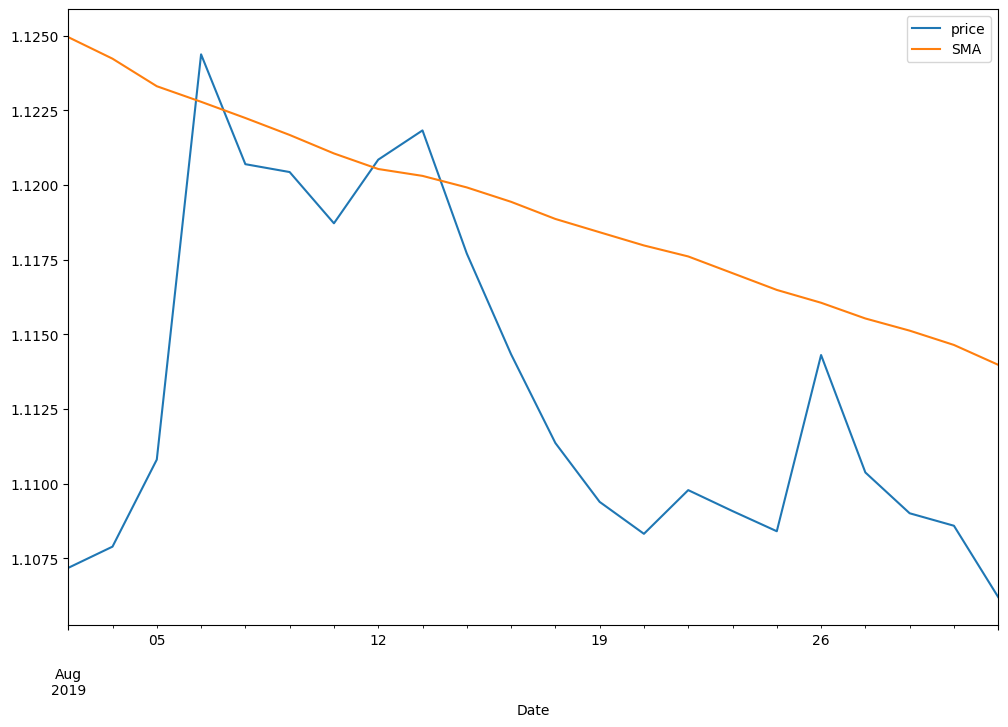

In [7]:
# Calculate SMA
SMA = 30
dev = 2
data["SMA"] = data["price"].rolling(SMA).mean()
# Visualize Data
data[["price", "SMA"]].plot(figsize = (12, 8))
plt.show()
# Zoom into August 2019
data.loc["2019-08", ["price", "SMA"]].plot(figsize = (12, 8))
plt.show()

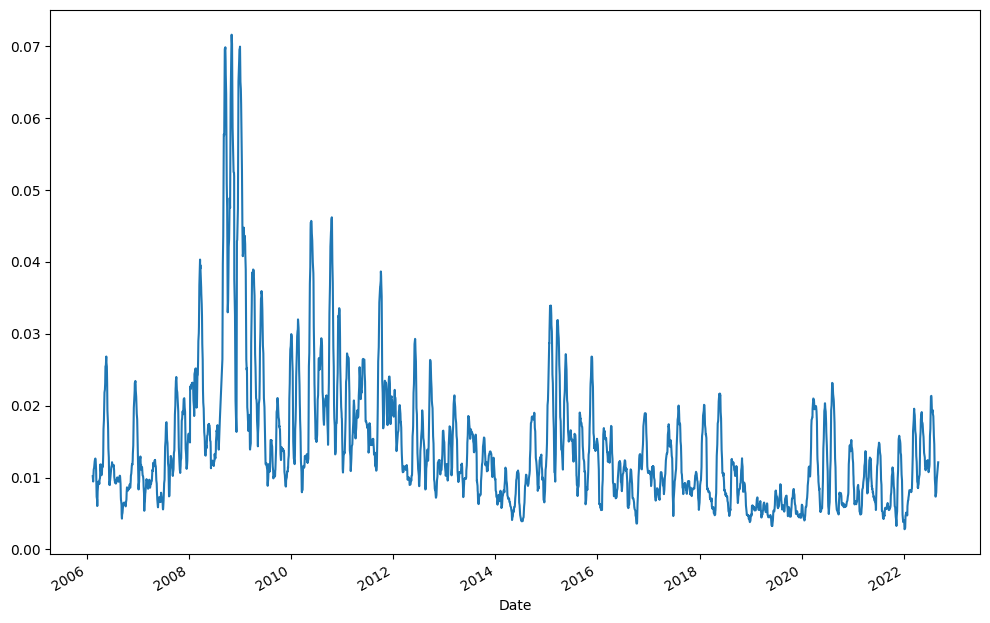

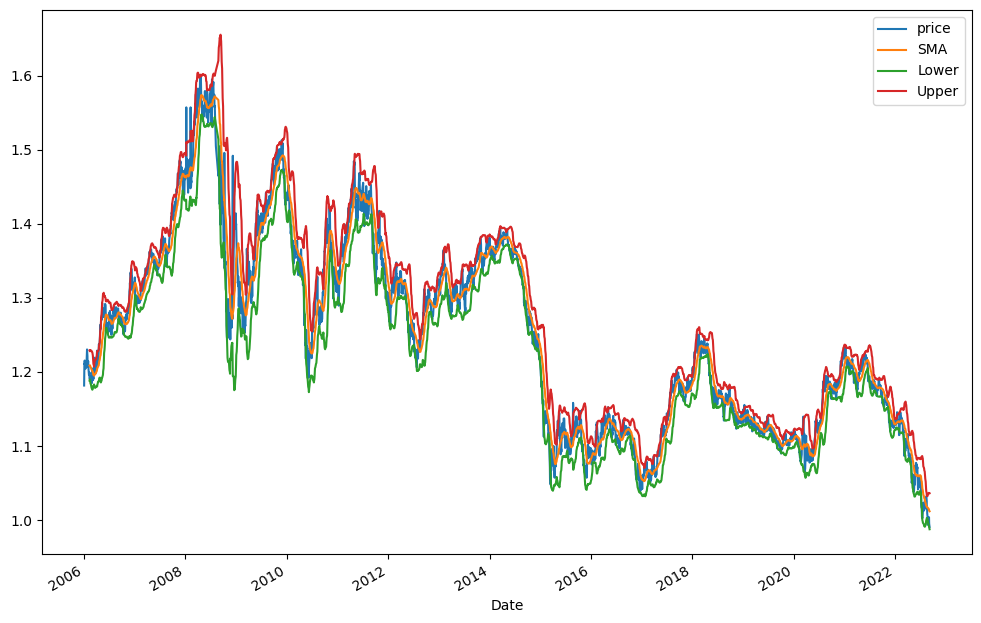

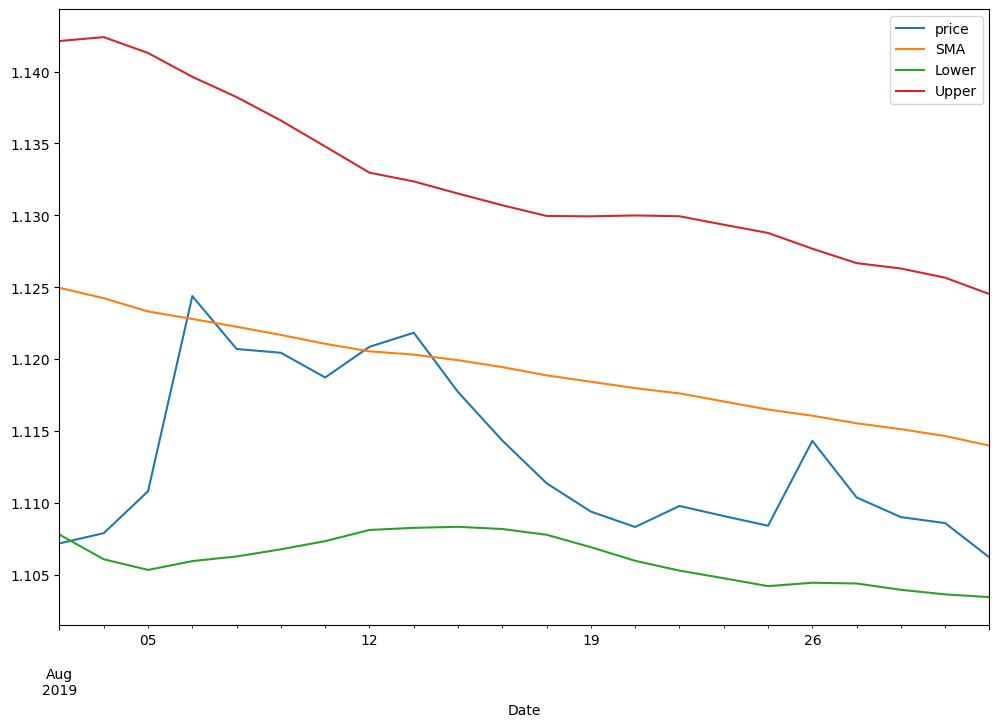

In [9]:
# Visualize standard deviation
# data["price"].rolling(SMA).std()
data["price"].rolling(SMA).std().plot(figsize = (12, 8 ))
plt.show()

# Define bands
data["Lower"] = data["SMA"] - data["price"].rolling(SMA).std() * dev # Lower Band -2 Std Dev
data["Upper"] = data["SMA"] + data["price"].rolling(SMA).std() * dev # Upper Band -2 Std Dev

# Visualize price SMA and bands
data.drop(columns = "returns").plot(figsize = (12, 8))
plt.show()

# Zoom into August 2019
data.drop(columns = "returns").loc["2019-08"].plot(figsize = (12, 8))
plt.show()


position
 0.0    1925
 1.0    1215
-1.0    1155
Name: count, dtype: int64


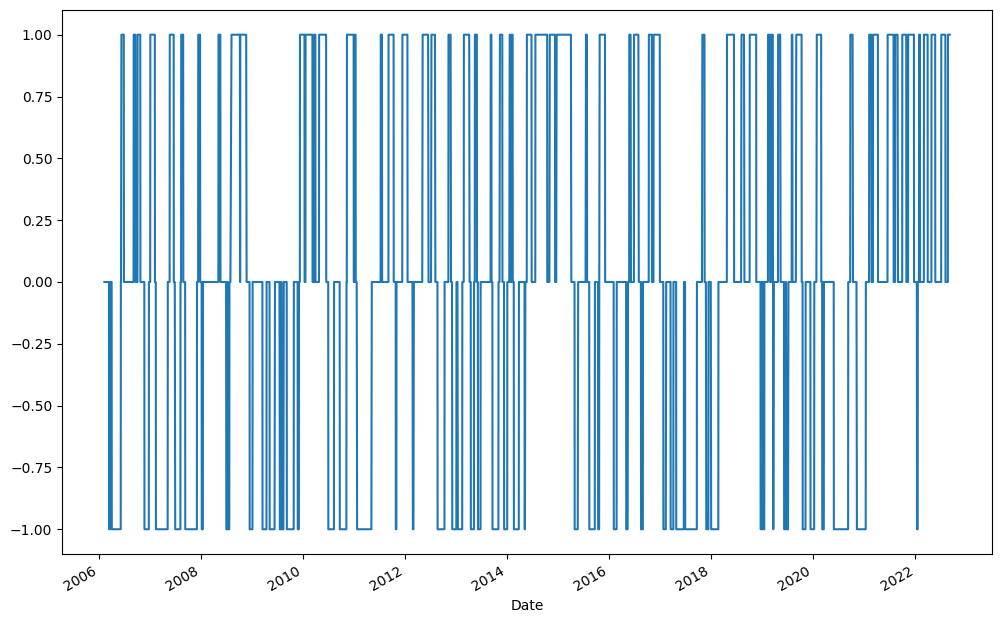

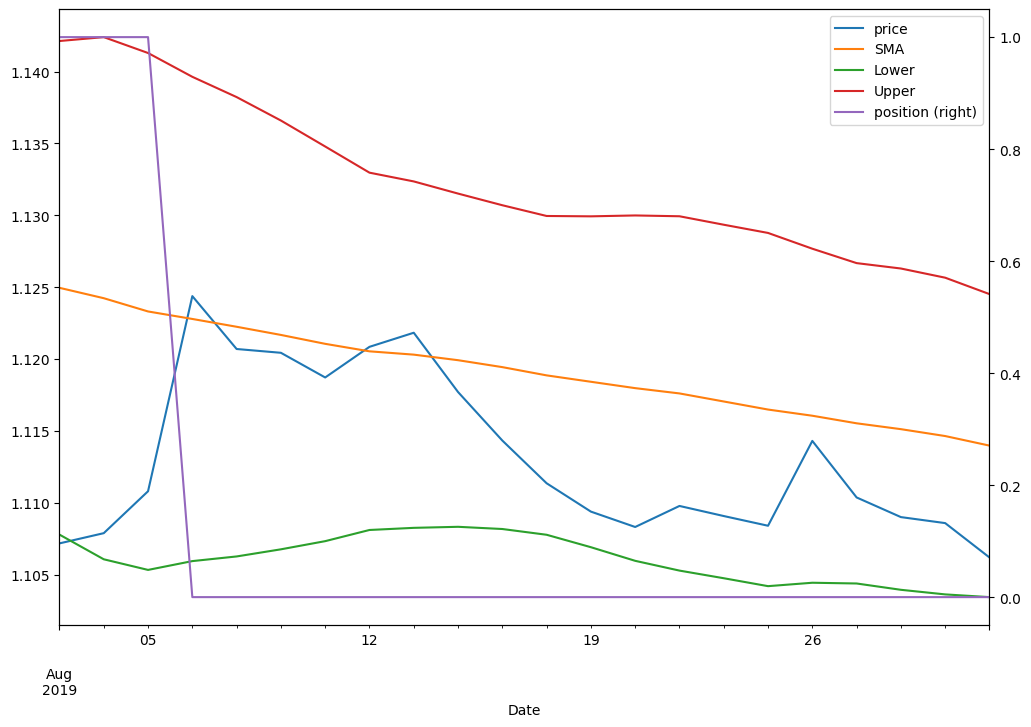

In [11]:
# Generate Strategy
data.dropna(inplace = True)
data["distance"] = data.price - data.SMA # helper Column
data["position"] = np.where(data.price < data.Lower, 1, np.nan) # 1. oversold -> go long
data["position"] = np.where(data.price > data.Upper, -1, data["position"]) # 2. overbought -> go short
data["position"] = np.where(data.distance * data.distance.shift(1) < 0, 0, data["position"])
data["position"] = data.position.ffill().fillna(0) # where 1-3 isn´t applicable -> hold previous position
print(data.position.value_counts())

# Visualize Position
data.position.plot(figsize = (12, 8))
plt.show()

# Zoom into August 2019
data.drop(columns = ["returns", "distance"]).loc["2019-08"].plot(figsize = (12, 8), secondary_y = "position")
plt.show()

